## Importation des librairies et du dataset


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics



In [5]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [117]:
data = pd.read_csv("online_shoppers_intention.csv")

# Analyse du data set et des variables: data visualisation

In [118]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Correlation des variables avec le revenu

Transformation de la dataframe

In [114]:
#On met la colonne revenu et de weekend en int (0 pour false 1 pour true)
data["Revenue"] = data["Revenue"].values.astype(int)
data["Weekend"] = data["Weekend"].values.astype(int)

#Convertir VisitorType en valeur  numérique
data["VisitorType"] = np.asarray([1 if val == "Returning_Visitor" else 2 if val == "New_Visitor" else 0 for val in data["VisitorType"].values])


#Convertir Month en valeur numérique
#On remarque qu'il n'y a pas Janvier et Avril
months = ["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i, val in enumerate(data["Month"]):
    data["Month"][i] = np.int64(months.index(val)) 

data

ValueError: ignored

Data Visualisation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


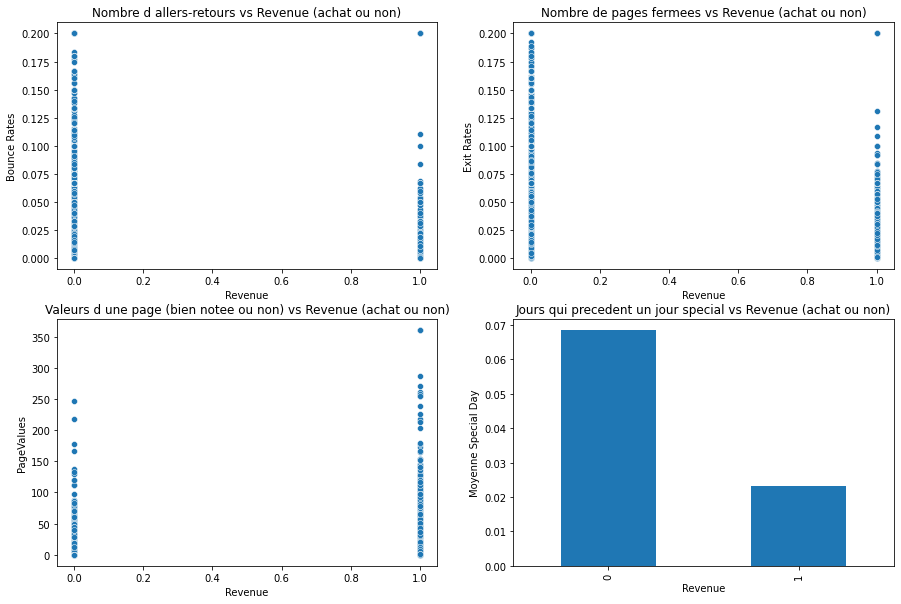

In [99]:
plt.figure(figsize=(15,10))

#Bounce rates et revenu 
plt.subplot(2, 2, 1)
sns.scatterplot(data['Revenue'],data['BounceRates'])
plt.title('Nombre d allers-retours vs Revenue (achat ou non)')
plt.ylabel('Bounce Rates')
plt.xlabel('Revenue')
#On remarque que moins on fait d'allers-retours entre les pages plus on achete 

#Exit rates et revenu 
plt.subplot(2, 2, 2)
sns.scatterplot(data['Revenue'],data['ExitRates'])
plt.title('Nombre de pages fermees vs Revenue (achat ou non)')
plt.ylabel('Exit Rates')
plt.xlabel('Revenue')
#Exit rate faible pour ceux qui achetent 

#Page Value et revenu 
plt.subplot(2, 2, 3)
sns.scatterplot(data['Revenue'],data['PageValues'])
plt.title('Valeurs d une page (bien notee ou non) vs Revenue (achat ou non)')
plt.ylabel('PageValues')
plt.xlabel('Revenue')
#Mieux la page est notee plus les gens achetent 


#Special day et revenu 
to_plot=data.groupby('Revenue')['SpecialDay'].mean() #On s'interesse a la moyenne
plt.subplot(2, 2, 4)
ax = to_plot.plot.bar() #diagramme en barre
plt.title('Jours qui precedent un jour special vs Revenue (achat ou non)')
plt.ylabel('Moyenne Special Day')
plt.xlabel('Revenue')
#Les gens achetent assez longtemps avant l'arrivee d'un 'jour special' pas quelques jours en avance seulement 


plt.show()

Text(0.5, 1.0, 'Achat en fonction des mois')

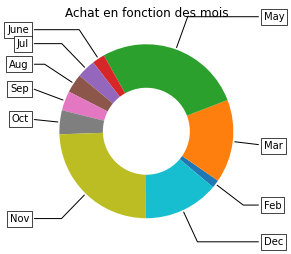

In [103]:
#Months et revenu

mois=["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] #Pour ecrire les mois dans le plot et pas les chiffres
data_months=data.groupby("Month")["Revenue"].count() #Le nombre de gens qui ont achete par mois
fig, ax = plt.subplots()
wedges, texts = ax.pie(data_months, wedgeprops=dict(width=0.5), startangle=-40) #Pie chart

#Style du pie chart avec nom de chaque mois 
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(mois[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw) #On ajoute le nom des mois

plt.title('Achat en fonction des mois')
#On remarque rapidement que Nov et mai sont les meilleurs  (Peut etre pour preparer Noel et l'ete?)

Text(0.5, 1.0, 'Revenue en fonction du systeme operateur de l utilisateur')

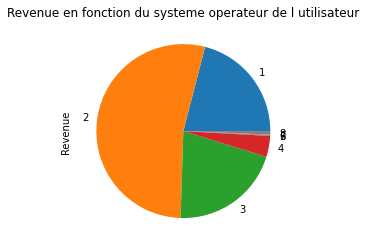

In [101]:
#OS et revenu
data.groupby("OperatingSystems")["Revenue"].count().plot.pie()
plt.title('Achat en fonction du systeme operateur de l utilisateur')

#Beaucoup de gens qui utilisent l'operating sytem numero 2 achetent 

Text(0.5, 1.0, 'Revenue en fonction du navigateur')

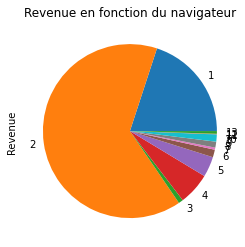

In [102]:
#Browser et revenu
data.groupby("Browser")["Revenue"].count().plot.pie()
plt.title("Achat en fonction du navigateur")
#Beaucoup de gens qui utilisent le browser numero 2 achetent 

Text(0.5, 1.0, 'Achat en fonction du type de trafic')

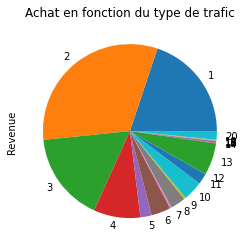

In [104]:
#TrafficType et revenu
data.groupby("TrafficType")["Revenue"].count().plot.pie()
plt.title('Achat en fonction du type de trafic')

Text(0.5, 1.0, 'Achat en fonction de la region')

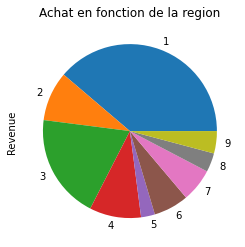

In [105]:
#Region et revenu
data.groupby("Region")["Revenue"].count().plot.pie()
plt.title('Achat en fonction de la region')

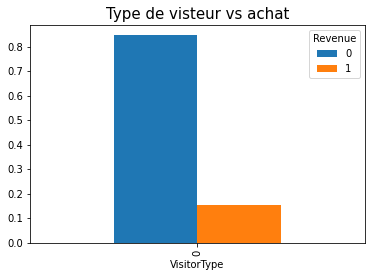

In [116]:
#Type de visiteur vs revenu

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar')
plt.title('Type de visteur vs achat', fontsize = 15)
plt.show()#0='Other', 1='Returning Visitor',2='New Visitor'})
#On remarque que les returning visitors achetent moins (Pas satisfaits?)

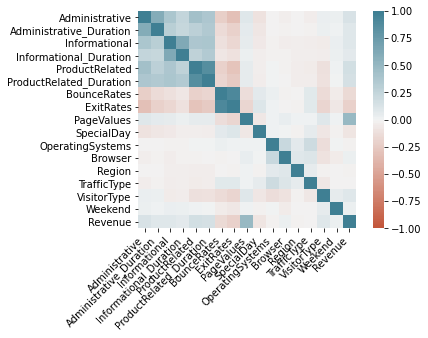

In [74]:
#Correlation entre variables 

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#On utilise cette matrice de correlation pour faire une visualisation avec plusieurs variables correlees au revenue 

## Correlation multivariables avec revenu

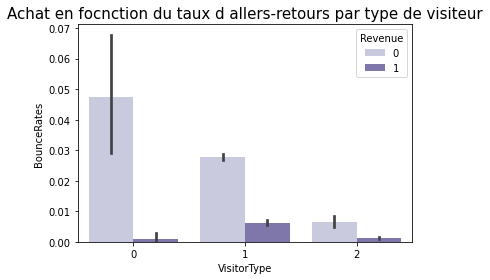

In [109]:
#Revenue/BounceRate Par Visitor type

sns.barplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('Achat en focnction du taux d allers-retours par type de visiteur', fontsize = 15)

plt.show()
#Les utilisateurs qui achetent le plus sont les returning visitors lorsqu'ils restent sur une seule page et ne font pas d'allers-retours
#Ceux qui achetent le moins sont ceux qui font le plus d'aller-retours parmis les utilisatuers de type 'other'

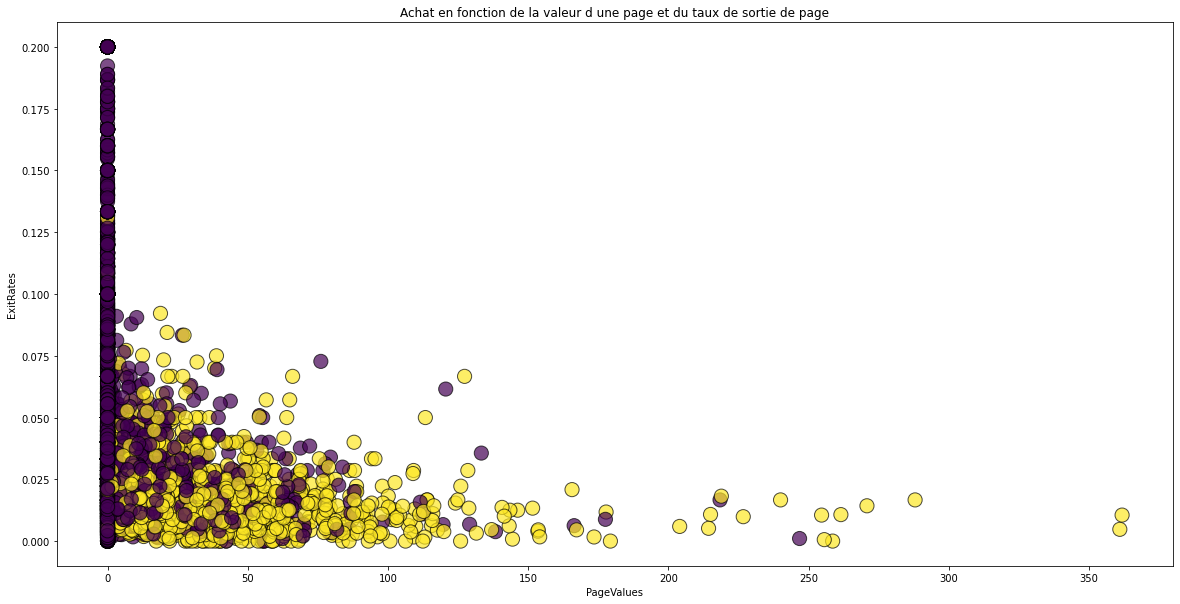

In [110]:
#Revenue/Page Value/Exit rate

fig = plt.figure(figsize=(20, 10))
plt.scatter(data['PageValues'],data['ExitRates'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data['Revenue'])

plt.title('Achat en fonction de la valeur d une page et du taux de sortie de page')
plt.xlabel('PageValues')
plt.ylabel('ExitRates')
#Jaune Pour revenue=True Violet sinon
plt.show()
#On remarque directement plus la page value est basse moins les utilisateurs achetent 
#Plus l'exit rate et elevee moins ils achetent 
#Si exit rate elevee et page value faible presque aucun utilisateur n'achete

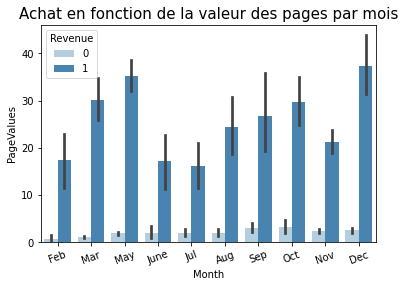

In [111]:
#Revenue/Month/Page Values 

sns.barplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'Blues')
plt.title('Achat en fonction de la valeur des pages par mois', fontsize = 15)
plt.xticks([0,1,2,3,4,5,6,7,8,9], ["Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=20)  # Pour voir le nom des mois
plt.show()


In [112]:
#On cree deux nouvelles dataframes: Une avec tous les utilisateurs qui n'ont pas achete et l'autre avec tous ceux qui ont achete
df_revenu0=pd.DataFrame(columns=['Administrative',
'Administrative_Duration',
'Informational',
'Informational_Duration',
'ProductRelated',
'ProductRelated_Duration',
'BounceRates',
'ExitRates',
'PageValues',
'SpecialDay',
'Month',
'OperatingSystems',
'Browser',
'Region',
'TrafficType',
'VisitorType',
'Weekend',
'Revenue'])
df_revenu1=df_revenu0

for i, row in data.iterrows():
  if row['Revenue']==0:
    df_revenu0 = df_revenu0.append(row, ignore_index=True)#On remplit les colonnes si revenue=0
  if row['Revenue']==1:
    df_revenu1 = df_revenu1.append(row, ignore_index=True)#On remplit les colonnes si revenue=1


In [79]:
df_revenu0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,0,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,0,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,0,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,0,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,0,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,9,4,6,1,1,1,1,0
10418,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,8,3,2,1,8,1,1,0
10419,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,8,3,2,1,13,1,1,0
10420,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,8,2,2,3,11,1,0,0


Text(0, 0.5, 'Duree passée sur une page relative a un produit')

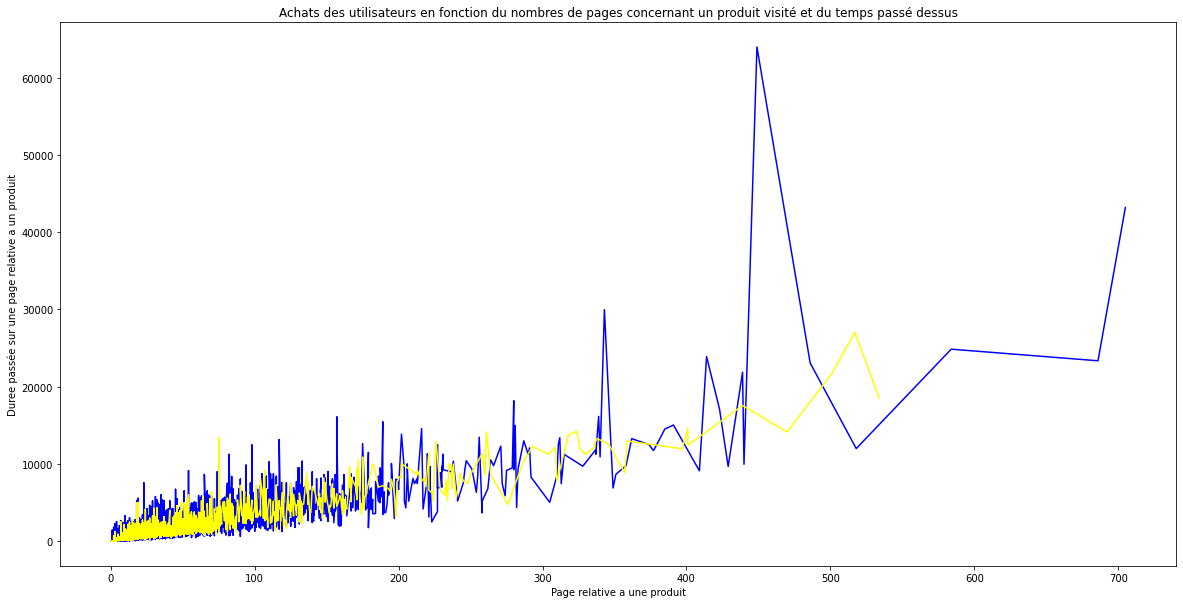

In [96]:
#Revenue/ProductedRelated_Duration/Product related 

fig = plt.figure(figsize=(20, 10))
dfrevenu0=df_revenu0.sort_values(by=['ProductRelated'])#On met dans l'ordre croissant 
dfrevenu1=df_revenu1.sort_values(by=['ProductRelated'])
plt.plot(dfrevenu0['ProductRelated'],dfrevenu0['ProductRelated_Duration'], color='Blue')
plt.plot(dfrevenu1['ProductRelated'],dfrevenu1['ProductRelated_Duration'],color='Yellow')
    
plt.title('Achat ou non des utilisateurs en fonction du nombres de pages concernant un produit visitées et du temps passé dessus')
plt.xlabel('Page relative a un produit')
plt.ylabel('Duree passée sur une page relative a un produit')
#En bleu utilisateurs qui n'ont pas achete et en jaune ceux qui ont achete
#On remarque que les utilisateurs qui restent longtemps sur une page relative a une produit et qui en visitent beaucoup achetent moins:
#Conculsion: Les utilisateurs qui achetent savent deja le(s) produit(s) qu'ils veulent